# Introducción a Deep Learning con Lasagne

## Antes un repaso de conceptos ..
### Aprendizaje Supervisado

La forma más comun de *machine learning*, sea profundo o no, es el aprendizaje supervisado.
Si queremos realizar un clasificador a partir de imagenes, vamos a recolectar las mismas y asociarles una etiqueta. En etapa de entrenamiento, una imagen es mostrada al clasificador y este genera una salida en forma de vector con *scores*, uno para cada categoría. La idea es que la categoría deseada tenga el *score* más alto posible. 

![knobs](../images/workflow.png "workflow")

Workflow tomado de [Deep learning for computational biology](http://onlinelibrary.wiley.com/doi/10.15252/msb.20156651/full)

Durante el entrenamiento calculamos una función que mide el error o distancia entre los *scores* que genera nuestro clasificador y los valores reales. Con el resultado de esta función, el clasificador modifica sus parametros para reducir este error. Estos parametros, usualmente llamados pesos, se pueden ver como "perillas" que definen la función entrada-salida de nuestro clasificador.


![knobs](../images/knobs.jpg "knobs")


## Redes neuronales

Ahora, pensemos en un problema, donde tenemos acceso a datos etiquetados del tipo $(x_i, y_i)$. Las redes neuronales nos permiten definir hipotesis no lineales y complejas de la forma $h_{W, b}(x)$, donde $W, b$ son los parametros que podemos adaptar a nuestros datos $(x_i, y_i)$.

![knobs](../images/rn.png "rn")

Consideremos una red neuronal con $N$ capas, las capas de entrada y salida estan representadas respectivamente como $X_0$ y $X_N$, donde el vector $X_{n-1}$ es la capa de entrada de $n$ (con $n=1, \cdots, N$).
Si $W_n$ es la matriz de pesos y $b_n$ el vector de bias, la salida de la capa $X_n$, puede ser representada de la siguiente manera:

$X_n = f(W_{n}X_{n-1} + b_n)$

Donde $f$ es la función de activación.

![activation](../images/activation.png "activation cheatsheet https://www.quora.com/What-is-the-role-of-the-activation-function-in-a-neural-network")
Imagen de [https://www.quora.com/What-is-the-role-of-the-activation-function-in-a-neural-network](https://www.quora.com/What-is-the-role-of-the-activation-function-in-a-neural-network)

Para ajustar los pesos, el algoritmo de aprendizaje computa el gradiente del vector, por cada peso, indicando por que cantidad el error se incrementaría o reduciría si el peso se aumentara en una pequeña cantidad. Luego el vector del peso es actualizado en la dirección opuesta al gradiente.

La **función objetivo**, promedidada sobre todos los elementos del entrenamiento, se puede ver como un paisaje montañoso. El vector del gradiente negativo nos indica la dirección hacia el terreno próximo con menor error, llevandonos asi al mínimo posible.

In [3]:
from lasagne import objectives
dir(objectives)

Using gpu device 0: GeForce GTX 860M (CNMeM is disabled, CuDNN not available)


['__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'aggregate',
 'align_targets',
 'as_theano_expression',
 'binary_accuracy',
 'binary_crossentropy',
 'binary_hinge_loss',
 'categorical_accuracy',
 'categorical_crossentropy',
 'multiclass_hinge_loss',
 'squared_error',
 'theano']

In [4]:
from lasagne import nonlinearities
dir(nonlinearities)

['LeakyRectify',
 'SELU',
 'ScaledTanH',
 'ScaledTanh',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'elu',
 'identity',
 'leaky_rectify',
 'linear',
 'rectify',
 'selu',
 'sigmoid',
 'softmax',
 'softplus',
 'tanh',
 'theano',
 'very_leaky_rectify']

Para llevar esta busqueda de error mínimo a la practica, se utiliza **Stochastic Gradient Descent**, esto consta de mostrar los vectores de entrada de un subconjunto de datos de entrenamiento, se computan las salidas, sus errores, se computa el gradiente para esos ejemplos y se ajustan los pesos acorde. Este proceso se repite por sobre varios subconjuntos de ejemplos hasta que el promedio de la función objetivo deja de decrecer.

Dado un problema de reconocimiento, la tarea del entrenamiento consiste en encontrar el conjunto de parametros óptimos $\{W_{n}, b_{n}\}$ que minimizan el error de clasificación.
Para determinar como estos parámetros se deberían modificar para reducir el error, se utiliza comunmente un algortimo de *gradient descent*.

La predicción del error la denotamos como  $e(X_{N}, X_{true})$. El gradiente de $e(X_{N}, X_{true})$ es calculado teniendo en cuenta los parámetros del modelo $\{W_{n}, b_{n}\}$.
Los valores de cada capa son actualizados mediante la toma de pequeños pasos:

$W_{n} \gets W_{n} - \eta  \frac{\partial e(X_{N}, X_{true})}{\partial W_{n}}$

$b_{n} \gets b_{n} - \eta  \frac{\partial e(X_{N}, X_{true})}{\partial b_{n}}$

Donde, $\eta$ es la *tasa de aprendizaje*, un hiperparámetro que controla el tamaño del paso hacia la convergencia.

Una buena práctica es trabajar con un $\eta$ que decrece de forma lineal a medida que los *epochs* avanzaban, mientras que el *momentum* se incrementaba.

![alt text](images/saddle_point_evaluation_optimizers.gif "gif de http://sebastianruder.com/optimizing-gradient-descent/")
Grafico de http://sebastianruder.com/optimizing-gradient-descent/

In [5]:
from lasagne import updates
dir(updates)

['OrderedDict',
 'T',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'adadelta',
 'adagrad',
 'adam',
 'adamax',
 'apply_momentum',
 'apply_nesterov_momentum',
 'get_or_compute_grads',
 'momentum',
 'nesterov_momentum',
 'norm_constraint',
 'np',
 'rmsprop',
 'sgd',
 'theano',
 'total_norm_constraint',
 'utils']

![alt text](../images/deeplearning.jpg "dl")

### Qué es Deep Learning ?

Deep learning permite que modelos computacionales compuestos por varias capas de procesamiento puedan aprender representaciones sobre datos con múltiples niveles de abstracción y, mediante esto, descubrir representaciones precisas en grandes volúmenes de datos de forma autónoma. 
Particularmente, Convolutional Neural Networks (ConvNets) constituyen el estado del arte de varios problemas de visión computacional, dado su gran desempeño de clasificación en grandes volúmenes de imágenes. Su gran performance está basada en cuatro ideas basales: conexiones locales, pesos compartidos, pooling y el uso de varias capas. 
![alt text](../images/capas_de_abstracci.png "structure")


### ConvNets
![alt text](../images/convnets.jpg "structure from http://ufldl.stanford.edu/tutorial/supervised/FeatureExtractionUsingConvolution/")

Una arquitectura clásica de ConvNet esta dada por dos etapas. La primer etapa se enfoca en **extraer características discriminantes** a distintos niveles de abstracción y la segunda se enfoca en la **clasificación** a partir de las características obtenidas previamente. La primera instancia esta compuesta por dos tipos de capas: de convolución y *pooling*.

<!---Las arquitecturas de ConvNets asumen que los datos con los que se trabajara son arreglos multidimensionales, gracias a esta suposición varias cualidades de los datos se pueden embeber en la arquitectura de la red. A diferencia de las redes neuronales convencionales, las *ConvNets* cuentan con unidades organizadas en tres dimensiones: ancho, alto y profundidad. --->

![alt text](../images/cnn.jpg "structure from http://ufldl.stanford.edu/tutorial/supervised/FeatureExtractionUsingConvolution/")




### Tipos de Capas

In [11]:
from lasagne.layers import InputLayer, Conv2DLayer, DropoutLayer,\
                           MaxPool2DLayer, DenseLayer
from lasagne.nonlinearities import rectify

#### Capas Densas

Todas las unidades ocultas estan conectadas con todas las unidades de entrada!

In [12]:
(DenseLayer, {'num_units': 256, 'nonlinearity': rectify})

(lasagne.layers.dense.DenseLayer,
 {'nonlinearity': <function lasagne.nonlinearities.rectify>, 'num_units': 256})

#### Capas de Convolución

En las capas de convolución, las unidades estan organizadas en *feature maps*, en las cuales cada unidad
esta conectada a *patches* locales de los *feature maps* pertenecientes a la capa anterior mediante un conjunto de pesos, llamados *filter bank*. Todas las unidades dentro de un *feature map* comparten el mismo *filter bank*, distintos *feature maps* dentro de la misma capa usan diferentes *filter banks*, la disposición de estos tiene dos justificaciones, por un lado, datos en forma de arreglos, como en nuestro caso, imágenes, subconjuntos locales tienden a estar altamente correlacionados y por otro lado la estadística local de las imágenes son invariantes a su ubicación.


![alt text](../images/Convolution_schematic.gif "gif de http://ufldl.stanford.edu/tutorial/supervised/FeatureExtractionUsingConvolution/")
*http://ufldl.stanford.edu/tutorial/supervised/FeatureExtractionUsingConvolution/


In [13]:
(Conv2DLayer, {'num_filters': 32, 'filter_size': 2})

(lasagne.layers.conv.Conv2DLayer, {'filter_size': 2, 'num_filters': 32})

#### Max Pooling
Para reducir la dimensionalidad de los *feature maps*, una capa de *pooling* es ubicada entre las capas de convolución. Las capas de *pooling* eliminan los valores no máximos calculando una función de agregación, comunmente se utiliza el maximo o el promedio sobre pequeñas regiones de la entrada. El proposito general de las capas de *pooling* es reducir el costo computacional en las capas ulteriores, reduciendo el tamaño de los futuros mapas de características y otorgando una forma de invariancia traslacional.


![alt text](images/maxpool.jpg " imagen de http://ufldl.stanford.edu/tutorial/supervised/FeatureExtractionUsingConvolution/")

In [14]:
(MaxPool2DLayer, {'pool_size': 2})

(lasagne.layers.pool.MaxPool2DLayer, {'pool_size': 2})


#### Dropout

Dropout es una técnica que previene que una red caiga en *overfitting* y provee una manera de combinar de forma eficiente varias arquitecturas de redes neuronales juntas.
El termino de dropout se refiere al descarte de unidades y sus conexiones (ya sea en capas ocultas o no) en una red neuronal, este descarte es solo temporal. La forma de elección de descarte es aleatoria, a cada unidad se le asocia un valor de probabilidad $p$ independiente del resto entre [0, 1].
![alt text](images/dropout_.png " de http://onlinelibrary.wiley.com/doi/10.15252/msb.20156651/full")

In [15]:
(DropoutLayer, {'p': 0.5})

(lasagne.layers.noise.DropoutLayer, {'p': 0.5})

## Lasagne


In [16]:
from IPython.display import IFrame
IFrame('http://lasagne.readthedocs.io/en/latest/', width=900, height=350)

# Clasifiquemos el tipo de nave que aparece en la imagen!

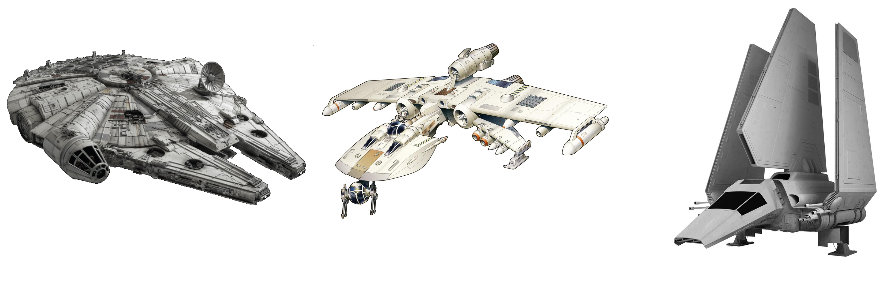

In [1]:
from IPython.display import Image
Image(filename='../images/ships.png') 

# Cómo son nuestros datos de entrada?
![alt text](../images/dataset.png)

### Cargando Imágenes a un Dataframe

In [17]:
import os
import pandas as pd
import cv2

In [20]:
def images_to_file(path_to_photos):
    """ """
    ids = [os.path.splitext(image_id)[0] for image_id in os.listdir(path_to_photos)]
    df_out = pd.DataFrame(columns=['Image', 'Model', 'Model_enc'], index=ids)
    for image_file in os.listdir(path_to_photos):
            image = cv2.imread(os.path.join(path_to_photos, image_file), 0)
            df_out['Image'][os.path.splitext(image_file)[0]] = ' '.join(map(str, image.flatten()))
            df_out['Model'][os.path.splitext(image_file)[0]] = image_file.split('_')[0]
       
    catenc = pd.factorize(df_out['Model'])
    df_out['Model_enc'] = catenc[0]
    print(catenc)
    df_out.to_csv('../star_wars_data.csv')
    
    return df_out

In [ ]:
images_to_file("../data/all/")

### Cómo quedo el archivo que generamos?

In [19]:
!head ../star_wars_data.csv

,Image,Model,Model_enc
falcon_165,135 94 30 14 3 7 2 7 5 7 6 4 6 5 20 58 58 20 20 18 17 26 22 29 20 6 11 10 14 47 81 140 144 150 163 146 99 115 117 140 141 153 157 93 102 204 139 115 140 150 63 14 20 35 38 32 63 49 53 42 65 67 75 107 159 117 37 68 113 43 102 57 30 37 52 20 12 22 23 34 24 28 29 66 94 56 38 46 53 39 23 53 58 21 63 119 152 81 76 148 161 253 228 172 212 242 228 223 227 213 168 177 164 138 105 125 147 144 144 132 140 130 124 130 127 137 174 196 79 41 36 18 11 5 5 4 6 5 5 7 9 5 15 48 60 22 13 14 18 25 21 25 24 11 11 9 10 36 69 125 143 145 153 150 104 113 113 128 142 145 165 160 109 161 166 133 126 161 79 10 39 36 43 40 43 47 37 47 56 69 114 136 157 88 45 89 137 76 87 111 74 61 34 15 14 18 25 16 24 16 23 69 90 56 36 35 45 39 32 34 49 26 55 139 100 65 79 67 152 255 221 171 225 224 192 167 166 177 162 164 155 121 107 124 157 156 128 128 132 129 132 156 183 202 206 189 28 42 42 17 19 31 1 16 8 5 5 8 11 5 10 36 60 28 9 11 16 18 20 23 25 16 10 11 9 24 58 110 137 136 141 149 104 99

### Ahora a darle formato a nuestros datos para nuestra red ...

In [21]:
import numpy as np
from sklearn.utils import shuffle

In [22]:
def load(images_dir="../data/all/"):
    """Load images and target class for Falcon, Lambda and K-wing ships."""
    df = images_to_file(images_dir)
    df['Image'] = df['Image'].apply(lambda im: np.fromstring(im, sep=' '))

    X = np.vstack(df['Image'].values) / 255.  # scale pixel values to [0, 1]
    X = X.astype(np.float32)

    y = df['Model_enc'].values
    X, y = shuffle(X, y, random_state=42)
    y = y.astype(np.int32)
    
    return X, y

### Qué necesitamos para armar nuestras redes ??

In [23]:
import warnings; warnings.simplefilter('ignore')
import theano
import lasagne
from lasagne.updates import nesterov_momentum
from nolearn.lasagne import NeuralNet
from lasagne.layers import InputLayer, Conv2DLayer, DropoutLayer,\
                           MaxPool2DLayer, DenseLayer
from lasagne.objectives import categorical_crossentropy
from nolearn.lasagne import BatchIterator

### Cómo se define la arquitectura de nuestra red ?!

In [53]:
def create_net(max_epochs=100):
    return NeuralNet(
        layers=[
                (InputLayer, {'shape': (None, 1, 128, 128)}),
                (Conv2DLayer, {'num_filters': 16, 'filter_size': 3, 'W': lasagne.init.GlorotUniform()}),
                (MaxPool2DLayer, {'pool_size': 2}),
                # (DropoutLayer, {'p': 0.5}),
                (Conv2DLayer, {'num_filters': 16, 'filter_size': 3, 'W': lasagne.init.GlorotUniform()}),
                (MaxPool2DLayer, {'pool_size': 2}),
                (DenseLayer, {'num_units': 100, 'nonlinearity': lasagne.nonlinearities.rectify}),
                (DropoutLayer, {'p': 0.5}),
                (DenseLayer, {'num_units': 3, 'nonlinearity': lasagne.nonlinearities.softmax}),
        ],
        update=nesterov_momentum,
        update_learning_rate=0.015,
        update_momentum=0.9,
        regression=False,
        objective_loss_function=categorical_crossentropy,
        #batch_iterator_train=BatchIterator(batch_size=512),
        #on_epoch_finished=[
        #    AdjustVariable('update_learning_rate', start=0.03, stop=0.001),
        #    AdjustVariable('update_momentum', start=0.9, stop=0.9999)  # ,
        #],
        max_epochs=max_epochs,
        verbose=1)

### Tuneando hiperparámetros

Alguno de los parametros más importantes a la hora de entrenar nuestra red son:
 - La estructura de la red
 - La tasa de aprendizaje, tipos de actualización
 - La inicialización de los pesos W
 - Regularización
 

![alt text](../images/split.png "http://onlinelibrary.wiley.com/doi/10.15252/msb.20156651/full")
Imagen de [Deep learning for computational biology](http://onlinelibrary.wiley.com/doi/10.15252/msb.20156651/full)

In [25]:
from sklearn.cross_validation import train_test_split
x, y = load("../data/all")
x = x.reshape(-1, 1, 128, 128)
X_train, X_test, y_train, y_test = train_test_split(x, y,
                                                    test_size=0.3,
                                                    random_state=42)
print(X_train.shape)

(array([0, 1, 1, ..., 0, 0, 1]), Index(['falcon', 'lambda', 'kwing'], dtype='object'))
(2924, 1, 128, 128)


In [54]:
net = create_net(20)
net.fit(X_train, y_train)

# Neural Network with 1442883 learnable parameters

## Layer information

  #  name        size
---  ----------  ----------
  0  input0      1x128x128
  1  conv2d1     16x126x126
  2  maxpool2d2  16x63x63
  3  conv2d3     16x61x61
  4  maxpool2d4  16x30x30
  5  dense5      100
  6  dropout6    100
  7  dense7      3

  epoch    trn loss    val loss    trn/val    valid acc  dur
-------  ----------  ----------  ---------  -----------  -----
      1     1.08054     1.02276    1.05649      0.67863  3.32s
      2     1.00087     1.03704    0.96513      0.60513  3.28s
      3     0.95188     0.74348    1.28030      0.73504  3.30s
      4     0.67342     0.54005    1.24697      0.81709  3.31s
      5     0.48251     0.32386    1.48987      0.88547  3.27s
      6     0.34287     0.23704    1.44647      0.91624  3.25s
      7     0.24732     0.18786    1.31651      0.94530  3.27s
      8     0.18158     0.16533    1.09829      0.93333  3.31s
      9     0.15042     0.12559    1.19768      0.962

NeuralNet(X_tensor_type=None,
     batch_iterator_test=<nolearn.lasagne.base.BatchIterator object at 0x7f34272fc9e8>,
     batch_iterator_train=<nolearn.lasagne.base.BatchIterator object at 0x7f34272fc908>,
     check_input=True, custom_scores=None,
     layers=[(<class 'lasagne.layers.input.InputLayer'>, {'shape': (None, 1, 128, 128)}), (<class 'lasagne.layers.conv.Conv2DLayer'>, {'num_filters': 16, 'filter_size': 3, 'W': <lasagne.init.GlorotUniform object at 0x7f33cde4a828>}), (<class 'lasagne.layers.pool.MaxPool2DLayer'>, {'pool_size': 2}), (<cla....layers.dense.DenseLayer'>, {'num_units': 3, 'nonlinearity': <function softmax at 0x7f3427351268>})],
     loss=None, max_epochs=20, more_params={},
     objective=<function objective at 0x7f3425db9598>,
     objective_loss_function=<function categorical_crossentropy at 0x7f34273312f0>,
     on_batch_finished=[],
     on_epoch_finished=[<nolearn.lasagne.handlers.PrintLog object at 0x7f33ccdd6fd0>],
     on_training_finished=[],
     on_tr

#### Y para chequear nuestros resultados??

In [27]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from nolearn.lasagne import visualize

In [55]:
print(classification_report(y_test, net.predict(X_test)))

             precision    recall  f1-score   support

          0       1.00      0.99      0.99       330
          1       0.99      0.99      0.99       473
          2       0.99      0.99      0.99       451

avg / total       0.99      0.99      0.99      1254



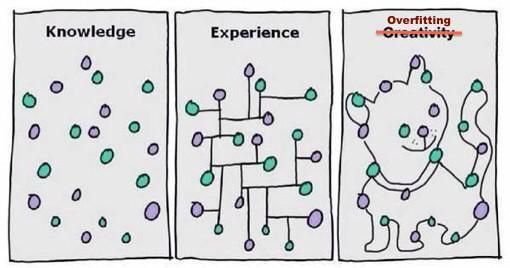

In [29]:
from IPython.display import Image
Image(filename='../images/overfitting.jpg') 

In [30]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm

#### Chequeando nuestro *learning rate*

![alt text](../images/lr.png "http://onlinelibrary.wiley.com/doi/10.15252/msb.20156651/full")
Imagen de [Deep learning for computational biology](http://onlinelibrary.wiley.com/doi/10.15252/msb.20156651/full)

<module 'matplotlib.pyplot' from '/usr/lib/python3.6/site-packages/matplotlib/pyplot.py'>

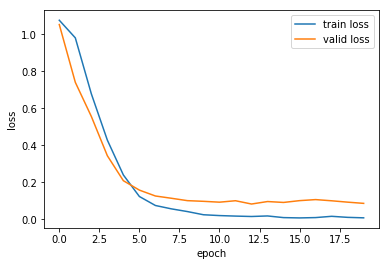

In [32]:
%matplotlib inline
visualize.plot_loss(net)

#### Cómo le fue a nuestra red entrenada en cuanto a clasificación de nuevas naves?
![alt text](../images/confusion_matrix.png)

In [33]:
def plot_matrix(clf, X_test, y_test):
    """Plot Confussion Matrix from a given classifier"""
   
    plt.clf()
    
    cm = confusion_matrix(y_test, clf.predict(X_test))
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print('Normalized confusion matrix')
    cm_normalized[np.isnan(cm_normalized)] = 0.0
    print(cm_normalized)
    plt.tick_params(labelsize=20)

    ax = plt.imshow(cm_normalized, interpolation='nearest', cmap=plt.cm.Reds)
    cb = plt.colorbar()
    cb.ax.tick_params(axis='both', labelsize=20)
    plt.ylabel("True label", fontsize=20)
    plt.xlabel("Predicted label", fontsize=20)
    plt.xticks(range(3),range(3))
    plt.yticks(range(3),range(3))



Normalized confusion matrix
[[ 0.98484848  0.0030303   0.01212121]
 [ 0.01691332  0.98097252  0.00211416]
 [ 0.02439024  0.01330377  0.96230599]]
[[325   1   4]
 [  8 464   1]
 [ 11   6 434]]


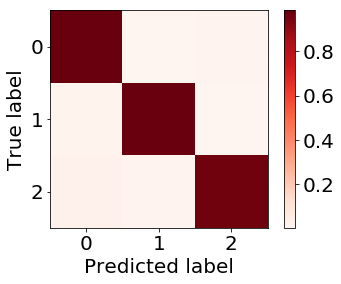

In [34]:
plot_matrix(net, X_test, y_test)
print(confusion_matrix(y_test, net.predict(X_test)))

### Tengo que entrenar mi red cada vez que quiero usarla?? 
Como guardar y abrir nuestras redes entrenadas

In [35]:
import pickle

with open('../data/ship_classifier.pickle', 'wb') as f:
        pickle.dump(net, f, -1)

In [36]:
net_loaded = None
with open('../data/ship_classifier.pickle', 'rb') as f:
       net_loaded = pickle.load(f)

In [37]:
from nolearn.lasagne import PrintLayerInfo
layer_info = PrintLayerInfo()

net_loaded.verbose = 1
net_loaded.initialize()
layer_info(net_loaded)

# Neural Network with 1442883 learnable parameters

## Layer information

  #  name        size
---  ----------  ----------
  0  input0      1x128x128
  1  conv2d1     16x126x126
  2  maxpool2d2  16x63x63
  3  conv2d3     16x61x61
  4  maxpool2d4  16x30x30
  5  dense5      100
  6  dropout6    100
  7  dense7      3



### Qué pasa dentro de la red?

In [23]:
net.layers

[(lasagne.layers.input.InputLayer, {'shape': (None, 1, 128, 128)}),
 (lasagne.layers.conv.Conv2DLayer,
  {'W': <lasagne.init.GlorotUniform at 0x7fb27c09e7f0>,
   'filter_size': 3,
   'num_filters': 16}),
 (lasagne.layers.pool.MaxPool2DLayer, {'pool_size': 2}),
 (lasagne.layers.conv.Conv2DLayer,
  {'W': <lasagne.init.GlorotUniform at 0x7fb27c09e828>,
   'filter_size': 3,
   'num_filters': 16}),
 (lasagne.layers.pool.MaxPool2DLayer, {'pool_size': 2}),
 (lasagne.layers.dense.DenseLayer,
  {'nonlinearity': <function lasagne.nonlinearities.rectify>,
   'num_units': 100}),
 (lasagne.layers.noise.DropoutLayer, {'p': 0.5}),
 (lasagne.layers.dense.DenseLayer,
  {'nonlinearity': <function lasagne.nonlinearities.softmax>, 'num_units': 3})]

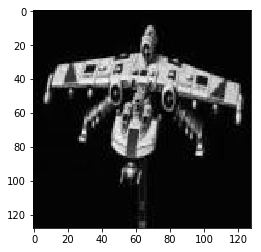

In [38]:
%matplotlib inline

my_image = cv2.imread("../data/kwing.jpg", 0)
plt.imshow(my_image, cmap='gray')
X = np.vstack(my_image) / 255.
plt.imshow(X, cmap='gray')
X = X.astype(np.float32)
X = X.reshape(-1, 1, 128, 128)

In [39]:
net.predict(X)

array([2])

#### Qué tan segura esta mi red de que identifico  ??

In [40]:
proba = net.predict_proba(X)
proba, proba.sum()

(array([[  7.31964576e-07,   1.54254039e-07,   9.99999166e-01]], dtype=float32),
 1.0)

In [41]:
proba[0, np.argmax(proba)]

0.99999917

#### Qué pasa si tapamos partes de nuestra imagen?? Que partes son importantes para la clasificación??

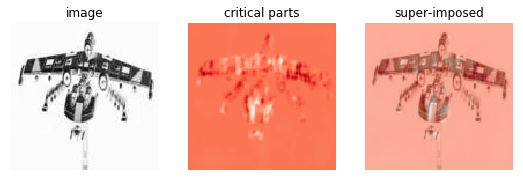

In [29]:
h = visualize.plot_occlusion(net, X, [2], square_length=3)

<module 'matplotlib.pyplot' from '/usr/lib/python3.6/site-packages/matplotlib/pyplot.py'>

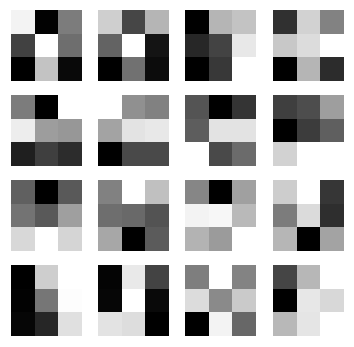

In [30]:
visualize.plot_conv_weights(net.layers_[1])

<module 'matplotlib.pyplot' from '/usr/lib/python3.6/site-packages/matplotlib/pyplot.py'>

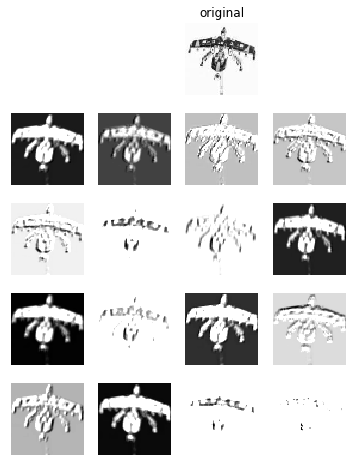

In [56]:
visualize.plot_conv_activity(net.layers_['conv2d3'], X)

### Ahora usemos nuestra red para clasificar desde video!!

In [46]:
tipos_naves = {0: 'Falcon', 1: 'Lambda', 2: 'K-wing'}

def format_net(my_image):
        X = np.vstack(my_image) / 255.
        X = X.astype(np.float32)
        X = X.reshape(-1, 1, 128, 128)
        
        return X

#### Mostrando el resultado frame por frame

In [57]:
import time
import cv2

def classifier_over_video(file_name):
    cap = cv2.VideoCapture(file_name)
    frames_count = cap.get(7)
    
    for frame_id in range(int(frames_count)):
        ret, frame = cap.read()
        frame_ = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)
        frame_ = cv2.equalizeHist(frame_)
        res = cv2.resize(frame_, (128, 128), interpolation = cv2.INTER_CUBIC)
        X = format_net(res)
        
        pred = tipos_naves[net.predict(X)[0]]
        proba = net.predict_proba(X)
        proba = str(proba[0, np.argmax(proba)])
        
        font = cv2.FONT_HERSHEY_SIMPLEX
        cv2.putText(frame, pred, (10, 500), font, 4, (255,255,255), 2, cv2.LINE_AA)
        cv2.putText(frame, proba, (10, 800), font, 4, (255,255,255), 2, cv2.LINE_AA)
        
        cv2.imshow('frame',frame)
        cv2.waitKey(1)
        
    cap.release()
    cv2.destroyAllWindows()

In [62]:
classifier_over_video("../data/videos_demo/lambda.mp4")

#### Con una pequeña trampa podemos tener una idea mas estable sobre el video ...

In [63]:
import time
import cv2
from collections import Counter

def classifier_over_video_most_common(file_name):
    cap = cv2.VideoCapture(file_name)
    frames_count = cap.get(7)
    clase = []
    
    for frame_id in range(int(frames_count)):
        ret, frame = cap.read()
        frame_ = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)
        frame_ = cv2.equalizeHist(frame_)
        res = cv2.resize(frame_, (128, 128), interpolation = cv2.INTER_CUBIC)
        X = format_net(res)
        clase.append(net.predict(X)[0])
        font = cv2.FONT_HERSHEY_SIMPLEX
        mi_nave_frecuente = Counter(clase).most_common(1)[0][0]
        cv2.putText(frame, tipos_naves[mi_nave_frecuente], (10,500), font, 4,(255,255,255), 2, cv2.LINE_AA)
        cv2.imshow('frame', frame)
        cv2.waitKey(1)
        
    cap.release()
    cv2.destroyAllWindows()

In [64]:
classifier_over_video_most_common("../data/videos_demo/lambda.mp4")

### Ahora armemos una red para regresion

In [65]:
import os
import cv2
import pandas as pd
import numpy as np
from sklearn.cross_validation import train_test_split

In [66]:
data_coordinates = pd.read_json("../data/landmarks.json")
data_coordinates

annotations  class  \
0     [{'class': 'point', 'x': 56.41939339381177, 'y...  image   
1     [{'class': 'point', 'x': 92.34564389570087, 'y...  image   
2     [{'class': 'point', 'x': 92.09264213160306, 'y...  image   
3     [{'class': 'point', 'x': 46.04632106580153, 'y...  image   
4     [{'class': 'point', 'x': 55.407386337420526, '...  image   
5     [{'class': 'point', 'x': 56.67239515790958, 'y...  image   
6     [{'class': 'point', 'x': 95.63466682897241, 'y...  image   
7     [{'class': 'point', 'x': 95.1286633007768, 'y'...  image   
8     [{'class': 'point', 'x': 50.34735105546431, 'y...  image   
9     [{'class': 'point', 'x': 59.202412798887686, '...  image   
10    [{'class': 'point', 'x': 47.5643316503884, 'y'...  image   
11    [{'class': 'point', 'x': 94.11665624438555, 'y...  image   
12    [{'class': 'point', 'x': 96.64667388536365, 'y...  image   
13    [{'class': 'point', 'x': 50.60035281956212, 'y...  image   
14    [{'class': 'point', 'x': 44.02230695301905, 'y...  image   
15    [{'class': 'point', 'x': 48.57633870677964, 'y...  image   
16    [{'class': 'point', 'x': 95.63466682897241, 'y...  image   
17    [{'class': 'point', 'x': 95.88766859307022, 'y...  image   
18    [{'class': 'point', 'x': 49.33534399907307, 'y...  image   
19    [{'class': 'point', 'x': 51.106356347757746, '...  image   
20    [{'class': 'point', 'x': 44.52831048121467, 'y...  image   
21    [{'class': 'point', 'x': 96.39367212126584, 'y...  image   
22    [{'class': 'point', 'x': 96.14067035716803, 'y...  image   
23    [{'class': 'point', 'x': 50.0943492913665, 'y'...  image   
24    [{'class': 'point', 'x': 46.805326358094966, '...  image   
25    [{'class': 'point', 'x': 47.311329886290586, '...  image   
26    [{'class': 'point', 'x': 101.95971093141767, '...  image   
27    [{'class': 'point', 'x': 101.45370740322205, '...  image   
28    [{'class': 'point', 'x': 50.34735105546431, 'y...  image   
29    [{'class': 'point', 'x': 47.81733341448621, 'y...  image   
...                                                 ...    ...   
3736                                                 []  image   
3737                                                 []  image   
3738                                                 []  image   
3739                                                 []  image   
3740                                                 []  image   
3741                                                 []  image   
3742                                                 []  image   
3743                                                 []  image   
3744                                                 []  image   
3745                                                 []  image   
3746                                                 []  image   
3747                                                 []  image   
3748                                                 []  image   
3749                                                 []  image   
3750                                                 []  image   
3751                                                 []  image   
3752                                                 []  image   
3753                                                 []  image   
3754                                                 []  image   
3755                                                 []  image   
3756                                                 []  image   
3757                                                 []  image   
3758                                                 []  image   
3759                                                 []  image   
3760                                                 []  image   
3761                                                 []  image   
3762                                                 []  image   
3763                                                 []  image   
3764                                                 []  image   
3765              

In [67]:
annotations = data_coordinates.drop(['class'], axis=1)

In [68]:
for i in range(annotations.shape[0]):
    if annotations['annotations'][i] == []:
        annotations['annotations'][i] = np.nan

In [69]:
annotations['filename'] = annotations['filename'].apply(lambda x: os.path.basename(x))
non_nan = annotations.dropna()
annotations.shape, non_nan.shape


((3766, 2), (497, 2))

In [70]:
def images_to_file_coordinates():
    """ """
    ids = non_nan['filename'].values
    
    df_out = pd.DataFrame(columns=['Image', 'x_0', 'y_0', 'x_1', 'y_1', 'x_2', 'y_2'], index=ids)
    for i, image_file in zip(non_nan.index.values, ids):
            image = cv2.imread(os.path.join('../data/all', image_file), 0)
            df_out['Image'][image_file] = ' '.join(map(str, image.flatten()))
            df_out['x_0'][image_file] = non_nan['annotations'][i][0]['x']
            df_out['y_0'][image_file] = non_nan['annotations'][i][0]['y']
            df_out['x_1'][image_file] = non_nan['annotations'][i][1]['x']
            df_out['y_1'][image_file] = non_nan['annotations'][i][1]['y']
            df_out['x_2'][image_file] = non_nan['annotations'][i][2]['x']
            df_out['y_2'][image_file] = non_nan['annotations'][i][2]['y']
    df_out.to_csv('../star_wars_data_coordinates.csv')
    return df_out

In [97]:
from sklearn import preprocessing

def load_coordinates():
    """Load images and target class for Falcon, Lambda and K-wing ships."""
    df = images_to_file_coordinates()
    df['Image'] = df['Image'].apply(lambda im: np.fromstring(im, sep=' '))

    X = np.vstack(df['Image'].values) / 255.  # scale pixel values to [0, 1]
    X = X.astype(np.float32)

    y = df[['x_0', 'y_0', 'x_1', 'y_1', 'x_2', 'y_2']].values
    print(y.shape)
    minmax = preprocessing.MinMaxScaler(feature_range=(-1, 1), copy=True)
    y = minmax.fit_transform(y)
    
    X, y = shuffle(X, y, random_state=42)
    y = y.astype(np.float32)
    
    return X, y, minmax

In [98]:
X_coor, y_coor, minmax = load_coordinates()

(497, 6)


### Extendiendo nuestras redes .. con lasagne ...

In [73]:
from nolearn.lasagne import BatchIterator
class FlipBatchIterator(BatchIterator):

    def transform(self, Xb, yb):
        Xb, yb = super(FlipBatchIterator, self).transform(Xb, yb)

        # Flip half of the images in this batch at random:
        bs = Xb.shape[0]
        indices = np.random.choice(bs, bs/2, replace=False) # /2 choose all
        Xb[indices] = Xb[indices, :, :, ::-1]

        if yb is not None:
            # Horizontal flip of all x coordinates:
            yb[indices, ::2] = yb[indices, ::2] * -1

        return Xb, yb

In [74]:
class AdjustVariable(object):
    def __init__(self, name, start=0.03, stop=0.001):
        self.name = name
        self.start, self.stop = start, stop
        self.ls = None

    def __call__(self, nn, train_history):
        if self.ls is None:
            self.ls = np.linspace(self.start, self.stop, nn.max_epochs)

        epoch = train_history[-1]['epoch']
        new_value = np.float32(self.ls[epoch - 1])
        getattr(nn, self.name).set_value(new_value)

### Creamos nuestra red para regresionar ...

In [75]:
from lasagne import layers

def create_net_coordinate():
    l = layers.InputLayer(shape=(None, 1, 128, 128))
    l = layers.Conv2DLayer(l, num_filters= 16, filter_size=(3, 3))
    l = layers.MaxPool2DLayer(l, pool_size=2)
    #l = layers.DropoutLayer(l, p=0.3)
    l = layers.Conv2DLayer(l, num_filters= 16, filter_size=(3, 3))
    l = layers.MaxPool2DLayer(l, pool_size=2)
    #l = layers.DropoutLayer(l, p=0.4)
    l = layers.DenseLayer(l, num_units=1024)
    l = layers.DropoutLayer(l, p=0.5)
    l = layers.DenseLayer(l, num_units=1024)
    l = layers.DenseLayer(l, num_units=6, nonlinearity=None)

    return NeuralNet(
        l,
        update=nesterov_momentum,
        update_learning_rate=theano.shared(np.float32(0.03)),
        update_momentum=theano.shared(np.float32(0.9)),

        regression=True,
        #batch_iterator_train=FlipBatchIterator(batch_size=75),
        #on_epoch_finished=[
        #    AdjustVariable('update_learning_rate', start=0.06, stop=0.006),
        #    AdjustVariable('update_momentum', start=0.9, stop=0.9999)  # ,
        #],
        max_epochs=100,
        verbose=1)

In [76]:
X_coor = X_coor.reshape(-1, 1, 128, 128)
X_train, X_test, y_train, y_test = train_test_split(X_coor, y_coor,
                                                            test_size=0.25,
                                                            random_state=42)
net_coor = create_net_coordinate()

In [77]:
net_coor.fit(X_train, y_train)

# Neural Network with 15804854 learnable parameters

## Layer information

  #  name    size
---  ------  ----------
  0          1x128x128
  1          16x126x126
  2          16x63x63
  3          16x61x61
  4          16x30x30
  5          1024
  6          1024
  7          1024
  8          6

  epoch    trn loss    val loss    trn/val  dur
-------  ----------  ----------  ---------  -----
      1     0.17525     0.16481    1.06334  0.48s
      2     0.15679     0.15710    0.99804  0.48s
      3     0.14933     0.15287    0.97683  0.48s
      4     0.14396     0.14807    0.97225  0.47s
      5     0.13453     0.13761    0.97761  0.47s
      6     0.12270     0.12328    0.99535  0.47s
      7     0.11095     0.11973    0.92670  0.47s
      8     0.10933     0.11992    0.91174  0.47s
      9     0.10225     0.10861    0.94141  0.47s
     10     0.09059     0.10330    0.87700  0.47s
     11     0.08650     0.09850    0.87811  0.47s
     12     0.08022     0.09326    0.86023  0.48s
  

NeuralNet(X_tensor_type=None,
     batch_iterator_test=<nolearn.lasagne.base.BatchIterator object at 0x7f34272fc9e8>,
     batch_iterator_train=<nolearn.lasagne.base.BatchIterator object at 0x7f34272fc908>,
     check_input=True, custom_scores=None,
     layers=[<lasagne.layers.dense.DenseLayer object at 0x7f33cead39e8>],
     loss=None, max_epochs=100, more_params={},
     objective=<function objective at 0x7f3425db9598>,
     objective_loss_function=<function squared_error at 0x7f3427331378>,
     on_batch_finished=[],
     on_epoch_finished=[<nolearn.lasagne.handlers.PrintLog object at 0x7f34644c0d30>],
     on_training_finished=[],
     on_training_started=[<nolearn.lasagne.handlers.PrintLayerInfo object at 0x7f34644c0ac8>],
     regression=True, scores_train=[], scores_valid=[],
     train_split=<nolearn.lasagne.base.TrainSplit object at 0x7f34272fca90>,
     update=<function nesterov_momentum at 0x7f3427331e18>,
     update_learning_rate=<TensorType(float32, scalar)>,
     update

<module 'matplotlib.pyplot' from '/usr/lib/python3.6/site-packages/matplotlib/pyplot.py'>

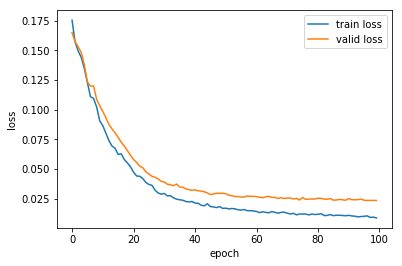

In [78]:
%matplotlib inline
visualize.plot_loss(net_coor)

In [79]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score
y_pred = net_coor.predict(X_test)
print(np.sqrt(mean_squared_error(y_test, y_pred)))
print(explained_variance_score(y_test.ravel(), y_pred.ravel()))
print(mean_absolute_error(y_test, y_pred))
print(r2_score(y_test, y_pred)) 

0.177955
0.80803155899
0.0944146
0.805713348345


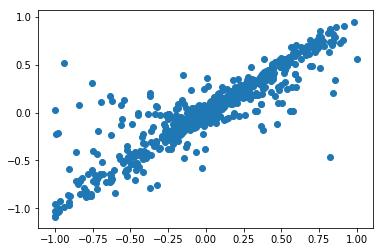

(0.89924639, 8.3119233101013713e-271)

In [80]:
from scipy.stats import pearsonr
plt.clf()
plt.scatter(y_test, net_coor.predict(X_test))
plt.show()
pearsonr(y_test.ravel(), net_coor.predict(X_test).ravel())

In [101]:
def plot_sample(img, y, axis, move=48):
    axis.imshow(img, cmap='gray')
    print(y[0::2])
    print(y[1::2])
    axis.scatter(y[0::2], y[1::2], marker='x', s=5)

In [93]:
y_pred[0].reshape((3, 2))


array([[-0.06538743,  0.95123911],
       [ 0.12306853,  0.87061536],
       [ 0.31638366,  0.3376348 ]], dtype=float32)

In [99]:
minmax.inverse_transform(y_pred[0].reshape((1, -1)))

array([[  67.86775208,  125.10507965,   69.40968323,  114.16452026,
          70.43952179,   81.09148407]], dtype=float32)

[ 67.86775208  69.40968323  70.43952179]
[ 125.10507965  114.16452026   81.09148407]


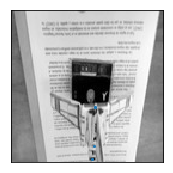

[ 69.8806839   69.30738068  67.86837006]
[ 72.51055145  65.93993378  57.35070038]


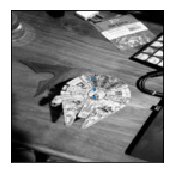

[ 38.60305405  68.88266754  94.90316772]
[ 59.3182106   58.95357513  60.88248825]


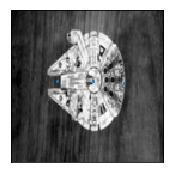

[ 70.98747253  71.72226715  74.56665802]
[ 85.48343658  72.40258789  52.6150589 ]


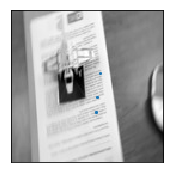

[ 45.58456802  52.54356766  59.05521774]
[ 30.52304649  67.71560669  93.65632629]


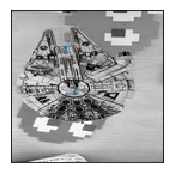

[ 68.37957764  67.40511322  62.42788315]
[ 102.9707489    85.97190094   72.00899506]


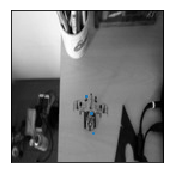

[ 83.74067688  67.52681732  41.30577469]
[ 69.984375    67.93241119  56.3700676 ]


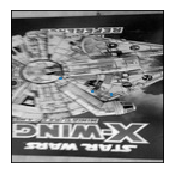

[ 69.79769135  69.52623749  69.40870667]
[ 79.31258392  56.04180527  20.52025032]


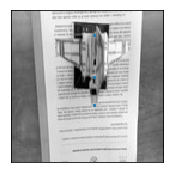

[ 68.390625    71.50047302  73.32470703]
[ 71.45008087  46.79636002  18.0506649 ]


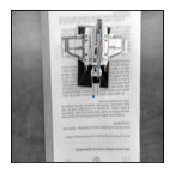

[ 52.84943008  59.14638138  68.01417542]
[  45.40571594   76.8616333   105.43030548]


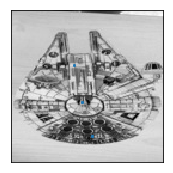

[ 61.3769455   64.39678192  61.63654709]
[ 56.47690582  74.94948578  91.13366699]


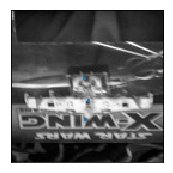

[ 104.48436737   79.50041199   41.65291977]
[ 60.90748215  61.7056694   60.49465942]


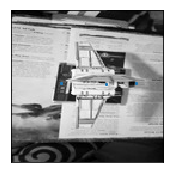

[ 66.07971191  65.93781281  66.36701202]
[ 73.80206299  83.19237518  94.31188965]


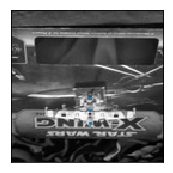

[ 108.36244202   65.58783722   21.27751541]
[ 60.08492661  63.29943466  64.7602005 ]


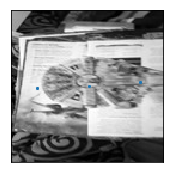

[ 67.1290741   65.84309387  63.96602249]
[ 102.53138733   90.09851074   76.67657471]


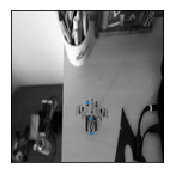

[ 72.53684998  77.05996704  83.36519623]
[ 122.00363922   82.81197357   32.1013031 ]


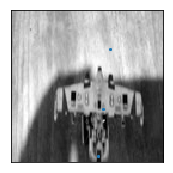

[ 71.92371368  68.43934631  69.15135956]
[ 98.00413513  73.81275177  40.93218231]


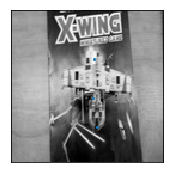

[ 63.30758667  63.85712814  65.23796082]
[ 94.66602325  78.57132721  47.84446716]


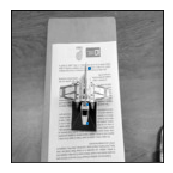

[ 97.78813171  78.99410248  50.45975876]
[ 72.39372253  66.53948212  56.25559235]


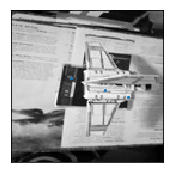

[ 68.6486969   24.78139877  -1.25646591]
[ 56.0843811   61.54280472  61.56726837]


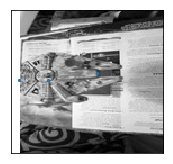

[ 58.84825897  22.37677383  -1.87585461]
[ 55.7061348   61.26735687  62.18382645]


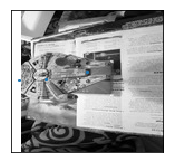

[ 68.06317902  59.24649048  45.37540817]
[ 87.92436218  80.91947937  65.45974731]


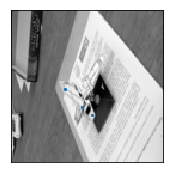

[ 74.12248993  39.78219604  14.34908199]
[ 60.13434601  64.25328064  63.3125267 ]


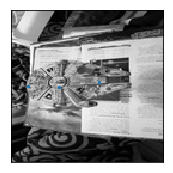

[ 67.3102417   75.83074951  81.90930939]
[ 88.2987442   66.37944794  46.20215225]


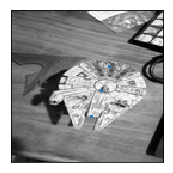

[ 93.93398285  92.08940125  94.33909607]
[ 110.10575104   71.44184113   31.84435272]


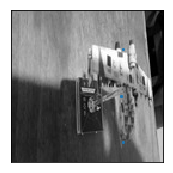

[ 104.20204163   73.81812286   16.41309166]
[ 64.87818146  67.99044037  65.72489166]


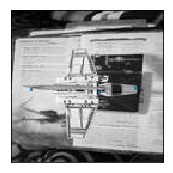

[ 65.12900543  64.25444794  58.93733215]
[ 93.81218719  64.65538025  17.4763546 ]


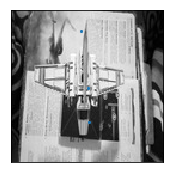

[ 79.62071991  63.55503082  48.24009705]
[ 92.14026642  78.26045227  62.6079216 ]


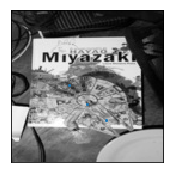

[ 51.81867218  67.23662567  79.33572388]
[ 63.4785347   63.94963837  62.92501831]


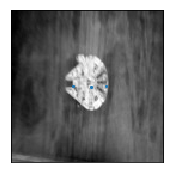

[ 68.6618576   67.94119263  69.42108917]
[ 122.20046997  112.04701996   79.76304626]


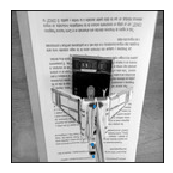

[ 111.41208649   67.83094788   20.45848083]
[ 59.81055832  61.05165863  63.38051605]


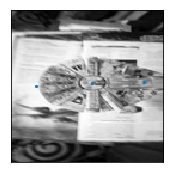

[ 69.80194855  63.71243286  61.6081543 ]
[ 95.89556122  64.2060318   21.2529335 ]


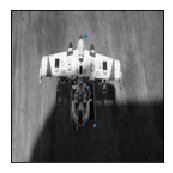

[ 38.01298904  69.00547791  96.00159454]
[ 57.98997879  58.14441299  60.18855667]


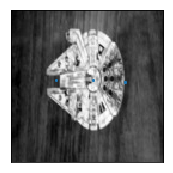

[ 67.84980011  65.74562836  62.95446396]
[ 102.78793335   90.43764496   75.83429718]


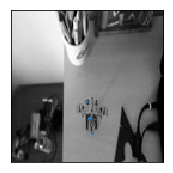

[ 51.68967819  66.07466125  78.72866058]
[ 64.13453674  64.69232178  67.27461243]


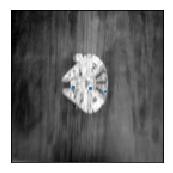

[ 50.32144547  53.3251152   60.51743698]
[ 109.16513062   76.63432312   21.96034622]


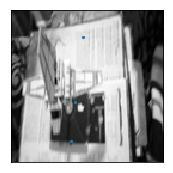

[ 95.21224976  66.73810577  12.78811455]
[ 66.83558655  65.70412445  64.3653183 ]


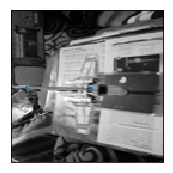

[ 77.66844177  38.3134613    9.94182587]
[ 54.63481522  59.55414581  59.44924164]


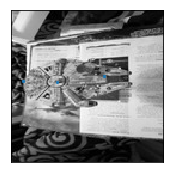

[ 67.56817627  66.38397217  65.74438477]
[ 95.57015991  70.0632782   42.47937393]


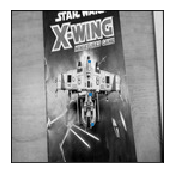

[ 62.75257874  65.50000763  65.87207031]
[ 92.20349884  82.87619019  55.5443573 ]


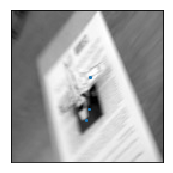

[ 51.03669357  66.78455353  80.1517334 ]
[ 64.56085205  64.97107697  65.03195953]


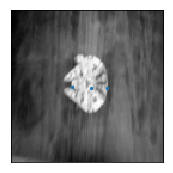

[ 51.19477844  66.51596069  81.27330017]
[ 64.93791199  65.58957672  67.70277405]


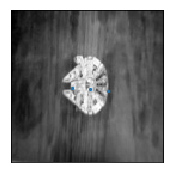

[ 92.68106079  42.90728378   1.95049059]
[ 59.18510056  60.12707138  62.4668808 ]


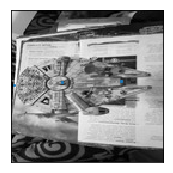

[ 85.56867981  44.1899147    7.53299427]
[ 62.79423141  66.41132355  67.09318542]


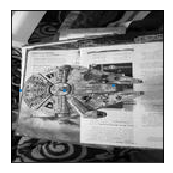

[ 67.38010406  67.87549591  69.81249237]
[ 96.18966675  73.38661957  39.1473999 ]


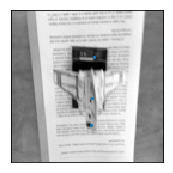

[ 84.30397034  79.13481903  73.50269318]
[ 116.35295105   68.87349701   12.94340229]


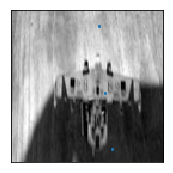

[ 70.48503876  67.57415009  63.60666656]
[ 62.62884521  33.14322662   8.36137104]


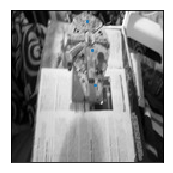

[ 71.5473175   64.82826233  64.86360168]
[ 72.98747253  72.16217804  66.95953369]


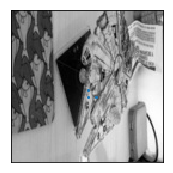

[ 71.66733551  67.83268738  63.35007858]
[ 91.80977631  68.35396576  34.73514175]


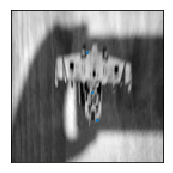

[ 90.31561279  79.77320862  64.56224823]
[ 70.83084869  70.97543335  71.22112274]


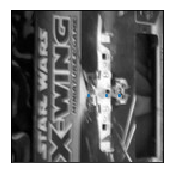

[ 59.10216904  59.95303345  58.90113068]
[ 65.58986664  79.03044891  93.22350311]


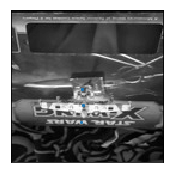

[ 67.14925385  66.01222992  63.74103928]
[ 104.71052551   94.1740799    79.12096405]


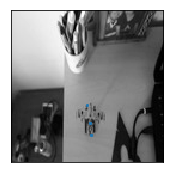

[ 76.49153137  56.87952042  21.63124275]
[ 62.69373322  63.13623428  60.02209473]


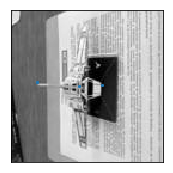

[ 103.53309631   70.13864136    8.05847645]
[ 79.16107178  80.05570984  90.0110321 ]


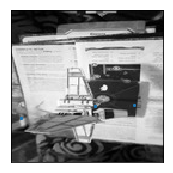

[ 82.62504578  34.1344223   -1.49807215]
[ 56.04519272  59.19839859  63.5047226 ]


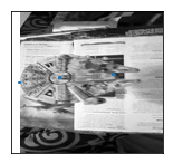

[ 68.11914825  66.30929565  62.23191833]
[ 102.97010803   87.05565643   72.13294983]


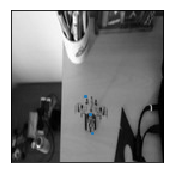

[ 68.0574646   59.58387756  52.43887711]
[ 57.65979385  65.68537903  68.27741241]


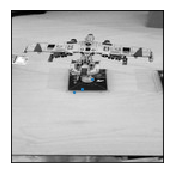

[ 85.56867981  44.1899147    7.53299427]
[ 62.79423141  66.41132355  67.09318542]


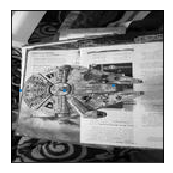

[ 76.27253723  71.58702087  62.75526047]
[ 87.86520386  67.27480316  37.89785385]


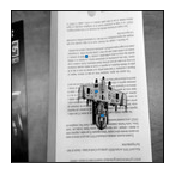

[ 87.57331848  55.4020462   27.66227341]
[ 57.06738281  60.35733414  56.68299103]


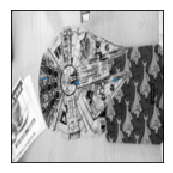

[ 111.23965454   68.2935257    24.47635269]
[ 60.88768768  63.03787994  64.88047791]


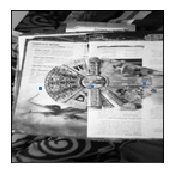

[ 66.890625    67.07173157  65.0169754 ]
[ 110.71583557   99.22745514   86.61837006]


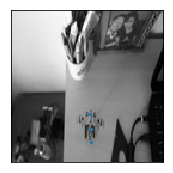

[ 62.53157806  65.51705933  62.85172272]
[ 61.17376709  73.61883545  82.63379669]


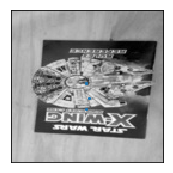

[ 68.6346817   67.01495361  63.89669418]
[ 103.44906616   85.14933014   70.58418274]


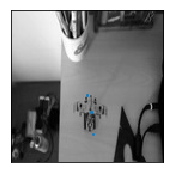

[ 86.88077545  87.57888794  80.73212433]
[ 101.61847687   47.53249741    0.56807387]


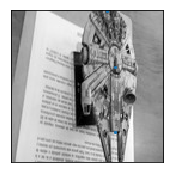

[ 70.26629639  70.51939392  67.46474457]
[ 77.07933044  51.87613297  18.29633141]


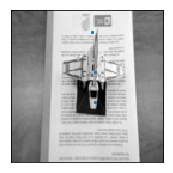

[ 65.45140839  59.3273735   49.79786682]
[ 81.53819275  77.55534363  65.48059845]


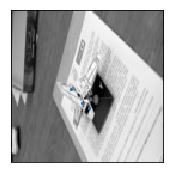

[ 66.70642853  69.05715179  70.8401413 ]
[ 73.4695282   49.37487411  21.83034897]


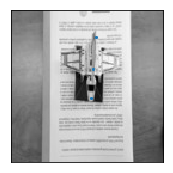

[ 60.01125336  61.07916641  59.6072998 ]
[ 66.42977905  78.65979004  90.74285126]


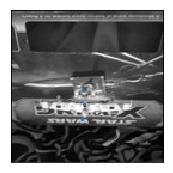

[ 70.32305145  68.32119751  63.72887421]
[ 76.67070007  55.3448143   25.34486389]


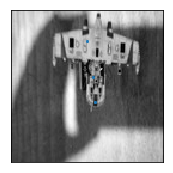

[ 76.42076874  57.7580719   25.42795563]
[ 37.20217896  35.20417404  41.3665123 ]


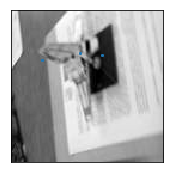

[ 65.76634979  66.74110413  65.56552887]
[ 109.66520691   98.57915497   84.8325119 ]


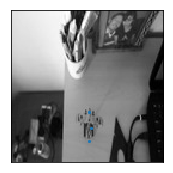

[ 107.16174316   72.06988525   14.93580818]
[ 53.45512009  59.07934189  53.68613052]


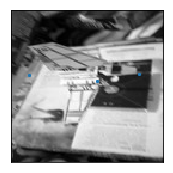

[ 69.13036346  67.42576599  67.10979462]
[ 75.29690552  87.41300964  97.11484528]


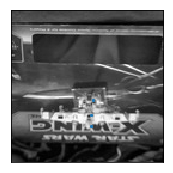

[ 91.7359848   91.54000092  90.84765625]
[ 109.33914948   73.14333344   29.96199226]


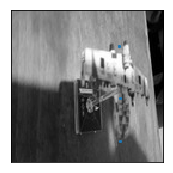

[ 77.67610168  77.98769379  80.12702942]
[ 89.64738464  73.27770233  50.49642181]


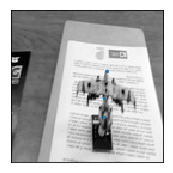

[ 67.21783447  67.77285767  70.83674622]
[ 117.99473572  101.19327545   64.35380554]


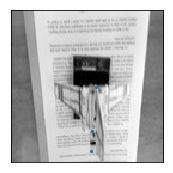

[ 65.23472595  24.80869865  -2.35927749]
[ 55.43836975  61.87339783  62.76340866]


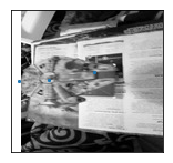

[ 78.73542786  28.04351997  -1.61250913]
[ 59.51576614  60.34473038  63.36362839]


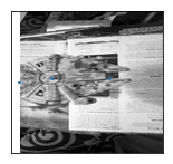

[ 66.55276489  65.97392273  63.74700165]
[ 102.82385254   91.09451294   76.2556076 ]


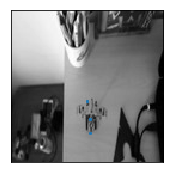

[ 93.97729492  75.97449493  32.46152115]
[ 71.58865356  72.28045654  68.70128632]


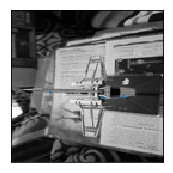

[ 60.68489838  20.80268478  -4.62905312]
[ 55.33054733  60.57028961  60.76602173]


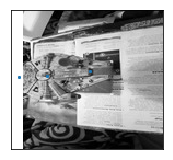

[ 83.6074295   42.23266602   7.11433887]
[ 57.69494629  60.08345032  61.50045776]


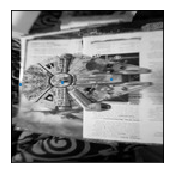

[ 70.17149353  65.88005829  55.5634613 ]
[ 61.59549332  68.74267578  77.42750549]


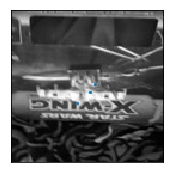

[ 71.81137848  59.23207855  51.86934662]
[ 63.6056633   65.99545288  67.56024933]


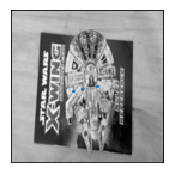

[ 69.15960693  69.73779297  72.23720551]
[ 68.89122009  42.34610748  13.31548595]


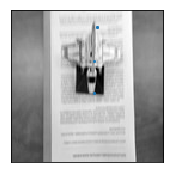

[ 103.75724792   73.30104065   20.1281414 ]
[ 67.3324585   71.08499908  73.09558105]


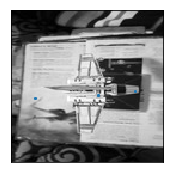

[ 59.03345871  21.70804214  -2.3728838 ]
[ 55.19184494  61.20531845  62.03491211]


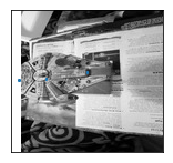

[ 102.81985474   36.78701401   -4.05075073]
[ 58.51499939  59.01366806  62.07118607]


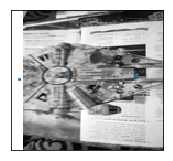

[ 68.57613373  24.48995018  -1.66320848]
[ 55.95215607  61.50805664  61.54688644]


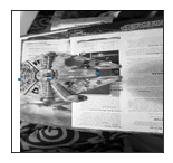

[ 68.66457367  71.80490875  73.93974304]
[ 71.021492    45.94054794  17.42500687]


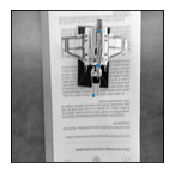

[ 68.66457367  71.80490875  73.93974304]
[ 71.021492    45.94054794  17.42500687]


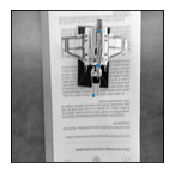

[ 65.20275116  66.26795959  64.22990417]
[ 111.31204987  101.3194809    89.50881958]


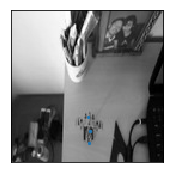

[ 63.00215149  63.6566391   65.33699799]
[ 94.81200409  78.93134308  48.59807205]


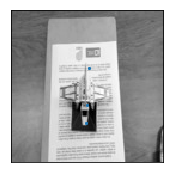

[ 105.64125061   84.84448242   48.73562241]
[ 68.177948    67.65920258  60.90972137]


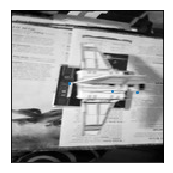

[ 94.95037842  93.52153778  95.75094604]
[ 111.01073456   71.39306641   29.94865608]


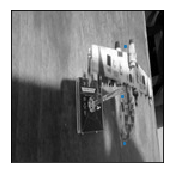

[ 82.91091156  67.2820282   41.95285416]
[ 70.33227539  67.46198273  55.94203949]


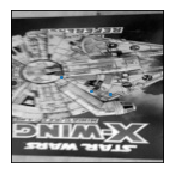

[ 102.5994873    80.3692627    28.59844398]
[  83.62743378   88.30091095  102.53451538]


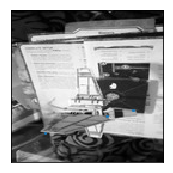

[ 69.78217316  67.60631561  63.70106125]
[ 81.06562042  61.82651901  39.52429581]


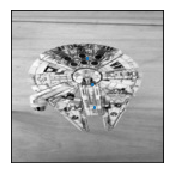

[ 95.58125305  60.33374786  28.56217384]
[ 60.10993576  38.27280045  25.83595467]


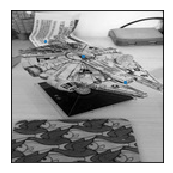

[ 63.40697098  64.99058533  67.60346222]
[ 107.6195755    79.57594299   38.01089859]


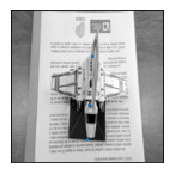

[ 94.70783234  43.02332687   0.97018528]
[ 58.39745712  61.04965973  64.32830811]


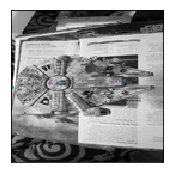

[ 65.00162506  65.7905426   66.70543671]
[ 90.0995636   70.68901062  45.47232056]


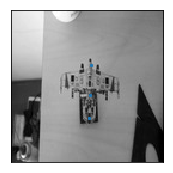

[ 82.40493774  50.20846176   8.69225883]
[ 67.19746399  63.5552063   58.26521683]


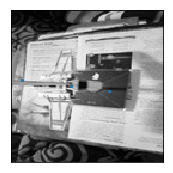

[ 90.71208191  79.20320129  63.02598572]
[ 71.56109619  72.39618683  69.25696564]


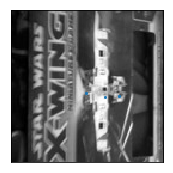

[ 74.44132996  75.2782135   75.16215515]
[ 73.51404572  52.90223312  33.95577621]


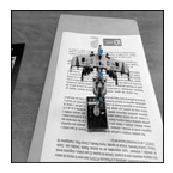

[ 65.41677856  66.06494904  69.79458618]
[ 78.43695831  66.70563507  53.60010529]


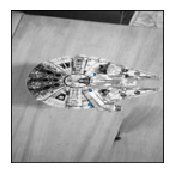

[ 37.02793121  67.13162994  92.9180603 ]
[ 55.42499924  56.0895195   58.30210114]


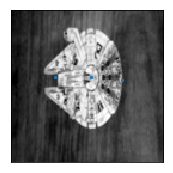

[ 47.89291382  63.5540657   78.91132355]
[ 67.08058167  67.77130127  70.11504364]


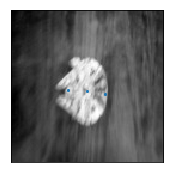

[ 106.08008575   74.46810913   31.31337547]
[ 63.53629303  68.4016571   68.23387909]


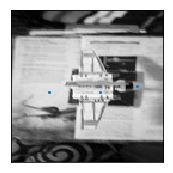

[ 87.31286621  42.74778748   7.76881123]
[ 52.74594879  57.29590225  62.57476807]


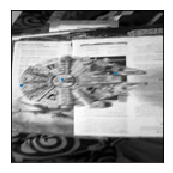

[ 70.00268555  65.32263947  62.79219818]
[ 92.72187042  63.32815552  24.08070755]


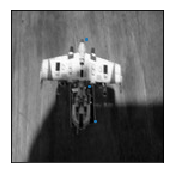

[ 106.229599     74.63237762   19.1363163 ]
[ 64.83972168  66.85706329  66.56678772]


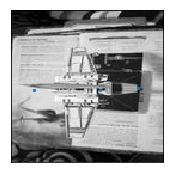

[ 51.39520264  66.00575256  77.92792511]
[ 63.07733154  64.01251984  64.42980194]


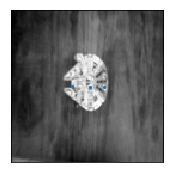

[ 106.42586517   83.02868652   29.03486824]
[ 86.22990417  88.19675446  98.78533936]


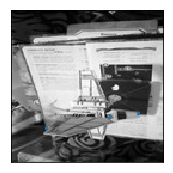

[ 72.45585632  67.83457947  58.41339493]
[ 80.93225098  62.52595139  36.42619324]


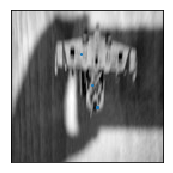

[ 74.07977295  69.87458038  66.75258636]
[ 98.31993103  77.58598328  39.71066284]


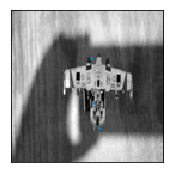

[ 74.44646454  64.86684418  64.67061615]
[ 76.68062592  71.59226227  72.95275879]


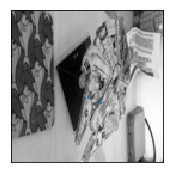

[ 102.93727875   75.19417572   19.13268852]
[ 63.37516785  64.93553162  68.50964355]


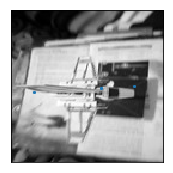

[ 70.44078064  72.45090485  71.3009491 ]
[ 66.94763184  41.81758118  15.85853195]


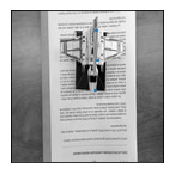

[ 96.82550812  61.22097778  29.13936043]
[ 55.0784874   59.30573654  59.95150375]


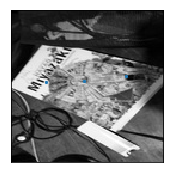

[ 85.38965607  44.98356247   8.64587784]
[ 63.8092041   67.09107208  67.80420685]


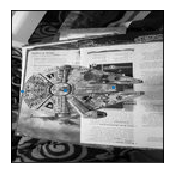

[ 70.48004913  69.6292038   67.65428925]
[ 72.50833893  65.92664337  56.83958054]


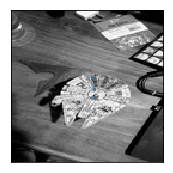

[ 65.91132355  66.48445129  68.7649765 ]
[ 72.82106018  57.06220245  35.58292389]


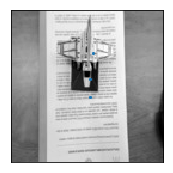

[ 73.6606369   83.64853668  94.7218399 ]
[ 89.27535248  63.35083389  38.62879562]


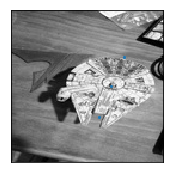

In [102]:
for i in range(X_test.shape[0]):
    plt.clf()
    fig = plt.figure(figsize=(6, 3))
    ax = fig.add_subplot(1, 2, 1, xticks=[], yticks=[])
    img = X_test[i].reshape(128, 128)
    plot_sample(img, minmax.inverse_transform(y_pred[i].reshape((1, -1)))[0], ax)
    plt.show()

In [103]:
import time
import cv2

def regresor_over_video(file_name):
    cap = cv2.VideoCapture(file_name)
    frames_count = cap.get(7)
    
    for frame_id in range(int(frames_count)):
        ret, frame = cap.read()
        frame_ = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)
        frame_ = cv2.equalizeHist(frame_)
        res = cv2.resize(frame_, (128, 128), interpolation = cv2.INTER_CUBIC)
        X = format_net(res)

        y_pred = minmax.inverse_transform(net_coor.predict(X)).ravel()
        for i in range(0, y_pred.shape[0], 2):
            new_scale = int(y_pred[i]*(frame.shape[1]/128.)), int(y_pred[i + 1] * (frame.shape[0]/128.))
            cv2.circle(frame, new_scale, 30, 155, -1)
        cv2.imshow('frame',frame)
        cv2.waitKey(1)
        
    cap.release()
    cv2.destroyAllWindows()

In [ ]:
regresor_over_video("data/videos_demo/lambda_regresor.mp4")

### Quiero profundizar más!

- [Neural Networks and Deep Learning free online book](http://neuralnetworksanddeeplearning.com/index.html)
- [CS231n: Convolutional Neural Networks for Visual Recognition](http://cs231n.github.io/)
- [Unsupervised Feature Learning and Deep Learning.](http://deeplearning.stanford.edu/tutorial/)

![alt text](../images/bye.jpg)
